In [57]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read original csv
rym = pd.read_csv("rym.csv")
print(rym.head())

   RYM Album  First Name    Last Name  First Name localized  \
0    3182509         NaN        Adele                   NaN   
1   13005983         The    Alchemist                   NaN   
2    7439765         The   Avalanches                   NaN   
3         63         The   Beach Boys                   NaN   
4    2548617         NaN  Beach House                   NaN   

    Last Name localized               Title  Release_Date  Rating Ownership  \
0                   NaN                  21          2011       9         n   
1                   NaN  This Thing of Ours          2021       7         n   
2                   NaN          Wildflower          2016       8         n   
3                   NaN          Pet Sounds          1966       8         n   
4                   NaN          Teen Dream          2010       7         n   

   Purchase Date  Media Type Review  
0            NaN         NaN     ""  
1            NaN         NaN     ""  
2            NaN         NaN    

In [58]:
# Select relevant columns from csv
rym_key = rym[[" First Name", "Last Name", "Title", "Release_Date", "Rating"]]
rym_key.columns = ["First", "Last", "Title", "Year", "Rating"]

# Merge First and Last names into one string under "Full" column
full_names = []
for ind, row in rym_key.iterrows():
    if str(row["First"]) == "nan":
        full_names.append(str(row["Last"]))
    elif str(row["Last"]) == "nan":
        full_names.append(str(row["First"]))
    else:
        full_names.append(str(row["First"]) + " " + str(row["Last"]))
rym_key = rym_key.assign(Full=full_names)

# Modify rym_key to only include Full Name, Title, Year and Rating
rym_key = rym_key[["Full", "Title", "Year", "Rating"]]
print(rym_key.head())

             Full               Title  Year  Rating
0           Adele                  21  2011       9
1   The Alchemist  This Thing of Ours  2021       7
2  The Avalanches          Wildflower  2016       8
3  The Beach Boys          Pet Sounds  1966       8
4     Beach House          Teen Dream  2010       7


In [59]:
# Update Ampersand symbol in Full and Title columns (appears as &amp;)
new_names = []
new_titles = []

for key, row in rym_key.iterrows():
    new_names.append(str(row["Full"]).replace("&amp;", "&"))
    new_titles.append(str(row["Title"]).replace("&amp;", "&"))
rym_key = rym_key.assign(Full = new_names, Title = new_titles)

# Show Examples
print(rym_key[(rym_key["Full"] == "Miguel") | (rym_key["Full"] == "Blu & Oh No")])

            Full                                    Title  Year  Rating
43   Blu & Oh No  A Long Red Hot Los Angeles Summer Night  2019       7
286       Miguel                            War & Leisure  2017       7


Top 5 Most Catalogued Artists:
Death Grips        7
Lil Ugly Mane      6
Earl Sweatshirt    5
Kanye West         4
Vince Staples      4
Name: Full, dtype: int64

     Rating  counts
9   Unrated       1
8         1       2
10        2       1
7         3       6
6         4      14
4         5      22
2         6      46
0         7      89
1         8      84
3         9      40
5        10      19


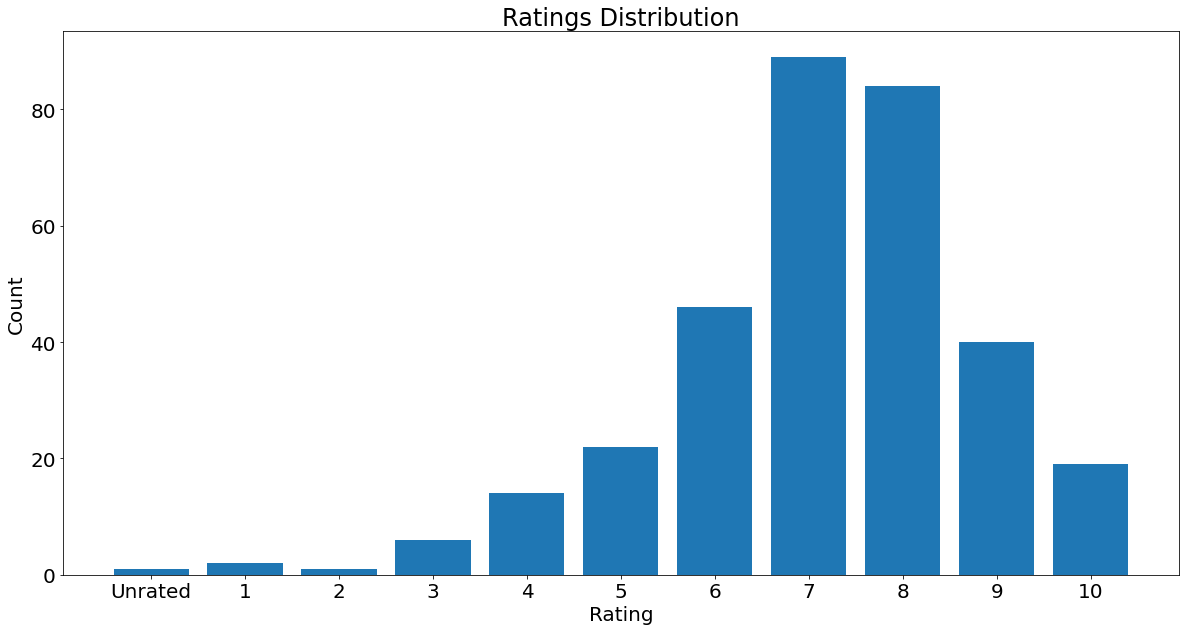

In [66]:
# Count values to determine most common artists catalogued.
artists = rym_key["Full"].value_counts()
print("Top 5 Most Catalogued Artists:")
print(artists.head())
print("")

# Count ratings to determine rating distribution
ratings = rym_key["Rating"].value_counts().rename_axis('Rating').reset_index(name='counts')
ratings = ratings.sort_values("Rating")
ratings = ratings.assign(Rating = ['Unrated', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
print(ratings)

# Visualize Rating Distribution using a Bar Graph
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 20.0
ratings_graph = plt.bar(ratings['Rating'], ratings['counts'])
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [61]:
# Stats not including ratings of 0 (which are unrated projects)
print(rym_key[rym_key["Rating"] != 0].describe())

              Year      Rating
count   323.000000  323.000000
mean   2013.925697    7.148607
std       9.933665    1.635084
min    1966.000000    1.000000
25%    2012.000000    6.000000
50%    2018.000000    7.000000
75%    2020.000000    8.000000
max    2022.000000   10.000000


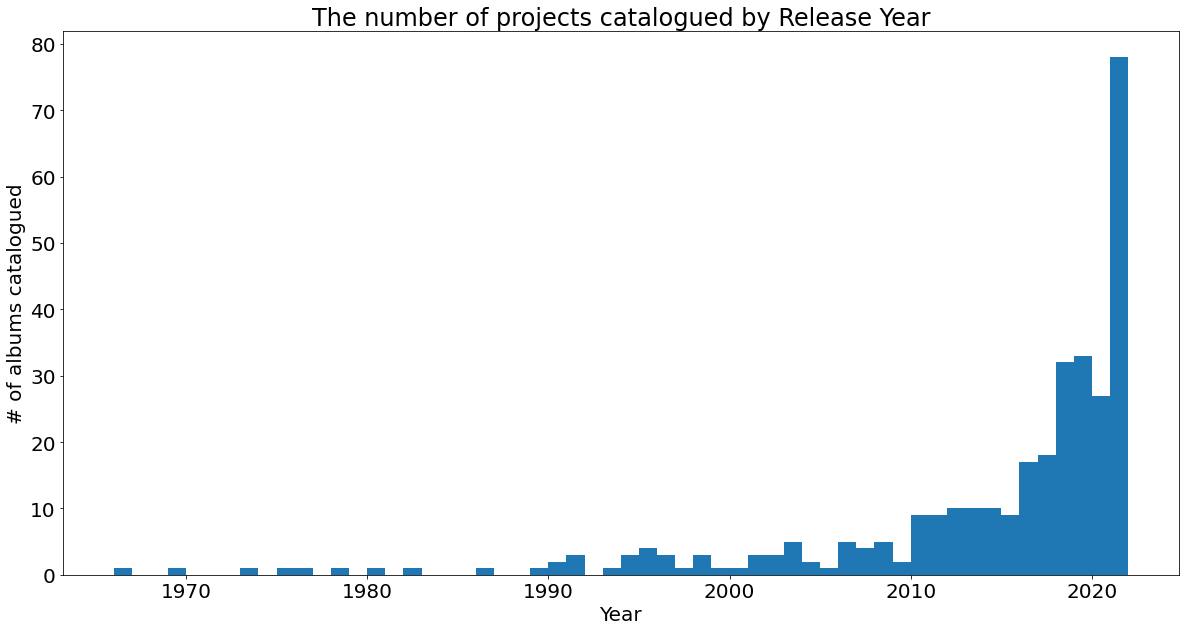

In [65]:
# Visualizing the distribution of albums by year using a histogram:

plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 20.0
plt.hist(rym_key["Year"], rym_key["Year"].max() - rym_key["Year"].min())
plt.title("The number of projects catalogued by Release Year")
plt.xlabel("Year")
plt.ylabel("# of albums catalogued")
plt.show()